1. Data Loading and Preprocessing:

Importing Important Libraries:
The imported modules handle image data preprocessing for deep learning tasks. "os" and "zipfile" manage file operations, including extracting data from ZIP archives. "numpy" enables numerical computations. "PIL" handles image processing. "sklearn.preprocessing" encodes labels. "tensorflow.keras.preprocessing.image" provides tools like ImageDataGenerator for generating augmented image data, crucial for training deep learning models on image datasets, collectively forming a robust toolkit for preparing image data, crucial for computer vision tasks.

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import zipfile
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Data Unzipping: The code begins by unzipping the dataset using the zipfile module. This step extracts the training and validation data from the ZIP file.

In [4]:
# Unzip the dataset
import zipfile
zip_file_path = r'C:\Users\atifi\Downloads\mord_data_scientist_take_home.zip'

# Check if the ZIP file exists
if os.path.exists(zip_file_path):
    # Unzip the dataset
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall()
else:
    print("Error: The ZIP file does not exist at the specified location.")

The train_dir and validation_dir variables store the directory paths where the training and validation datasets are located, respectively. These directories contain the image data organized into subdirectories corresponding to different classes or categories.

In [5]:
train_dir = 'mord_data_scientist_take_home/train'
validation_dir = 'mord_data_scientist_take_home/validation'

ImageDataGenerator: ImageDataGenerator is used to generate batches of image data with real-time data augmentation. It preprocesses the images by rescaling their pixel values to the range [0, 1].

Flow from Directory: The flow_from_directory method generates batches of augmented data from image files in a directory. It automatically labels the images based on the subdirectory structure.

In [6]:
# Preprocess the images  #generators
image_size = (224, 224) 
batch_size = 32  

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4000 images belonging to 2 classes.


In [7]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1000 images belonging to 2 classes.


2. Model Building

Assumptions Underlying this Model Building Process:

1. Convolutional Neural Networks (CNNs) are chosen for image classification due to their ability to automatically learn hierarchical features from raw pixel data, making them effective for tasks like object recognition.
2. The selected architecture, comprising convolutional layers followed by dense layers, efficiently extracts features from input images and learns high-level representations for accurate classification.
3. The Adam optimizer's adaptive learning rate and momentum, along with categorical crossentropy loss, effectively minimize the difference between predicted probabilities and true class labels, enhancing model performance in multi-class classification tasks.

The model building process begins with importing TensorFlow and the necessary Keras components. 

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

A Sequential model is instantiated, representing a linear stack of layers. Convolutional layers are added to extract features from input images, followed by max-pooling layers to downsample the feature maps and reduce computational complexity. The Flatten layer reshapes the 3D feature maps into a 1D feature vector for input to the dense layers. Dense layers are then added for classification, with ReLU activation used for hidden layers and softmax activation for the output layer to output class probabilities.

In [14]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

The model is compiled using the Adam optimizer, categorical crossentropy loss function, and accuracy as the evaluation metric. 

In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

The summary of the model architecture is displayed, providing insights into the layers, output shapes, and total trainable parameters. This step helps in verifying the model structure and ensuring it aligns with the intended design.

In [16]:
# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Based on the summary of model:

Model's Complexity: The model consists of three convolutional layers followed by max-pooling layers, flattening layer, and two dense layers. The total number of parameters is 11,169,218, indicating a moderately complex model architecture. The complexity arises from the large number of trainable parameters in the dense layers, especially the first dense layer with 11,075,712 parameters.

Memory Requirements: The model's total parameters amount to 42.61 MB, which is relatively large. This suggests that the model requires significant memory resources, both during training and inference. The memory requirements may pose challenges, especially when deploying the model on resource-constrained devices or when training multiple models simultaneously.

Training Efficiency: While the model's architecture is complex, the efficiency of training depends on various factors such as the dataset size, hardware resources, and optimization techniques. With appropriate hardware resources (e.g., GPUs or TPUs) and optimization strategies (e.g., batch normalization, learning rate scheduling), the model can be trained efficiently. However, the large number of parameters may result in longer training times compared to simpler models, necessitating careful monitoring and optimization to ensure training efficiency.

 3. Model Training

The model is trained using the fit() function, which takes the training generator (train_generator) as input along with the number of epochs (10) and the validation generator (validation_generator).

In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

The CustomPyDataset class defines a custom data generator, allowing for efficient loading and processing of image data in batches. It overrides the __len__() method to determine the number of batches per epoch, __getitem__() method to fetch batches of data, and on_epoch_end() method to shuffle the data after each epoch.

In [24]:
class CustomPyDataset(tf.keras.utils.Sequence):
    def __init__(self, images, labels, batch_size):
        super().__init__()
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.images))

    def __len__(self):
        return len(self.images) // self.batch_size

    def __getitem__(self, index):
        start_index = index * self.batch_size
        end_index = (index + 1) * self.batch_size
        batch_images = self.images[start_index:end_index]
        batch_labels = self.labels[start_index:end_index]
        return batch_images, batch_labels

    def on_epoch_end(self):
        np.random.shuffle(self.indexes)


In [27]:
# Train the model using the generators
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.8242 - loss: 0.3792 - val_accuracy: 0.6930 - val_loss: 0.6464
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.8803 - loss: 0.2842 - val_accuracy: 0.7280 - val_loss: 0.6122
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.9165 - loss: 0.2151 - val_accuracy: 0.7180 - val_loss: 0.7634
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.9503 - loss: 0.1340 - val_accuracy: 0.7230 - val_loss: 0.8482
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.9709 - loss: 0.0766 - val_accuracy: 0.7220 - val_loss: 0.9511
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.9781 - loss: 0.0626 - val_accuracy: 0.7140 - val_loss: 1.3127
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.9879 - loss: 0.0394 - val_accuracy: 0.7210 - val_loss: 1.3786
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.9904 - loss: 0.0322 - val_accu

The training results show the model's performance metrics (accuracy and loss) on both the training and validation sets for each epoch. The accuracy steadily improves with each epoch on the training set, indicating that the model is learning from the data.

4. Model Evaluation

In [28]:
# Evaluate model performance on validation data
val_loss, val_acc = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)

32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 232ms/step - accuracy: 0.7329 - loss: 1.5075
Validation Loss: 1.4389533996582031


In [29]:
print("Validation Accuracy:", val_acc)

Validation Accuracy: 0.7310000061988831


The model.evaluate() function computes the loss and accuracy metrics of the model on the validation data. The validation loss is approximately 1.44, and the validation accuracy is approximately 0.73.

Here's what these statistics indicate:

Validation Loss (1.44): This represents the average loss incurred by the model on the validation dataset during the evaluation. Loss is a measure of how well the model's predictions match the actual labels. Lower validation loss values indicate better performance, as they suggest that the model's predictions are closer to the true labels.

Validation Accuracy (0.73): This represents the proportion of correctly classified samples in the validation dataset. An accuracy of 0.73 means that the model correctly predicted the class of about 73% of the validation samples. Higher validation accuracy values indicate better performance, as they suggest that the model's predictions are more accurate.

In [30]:
# Visualize training progress
import matplotlib.pyplot as plt

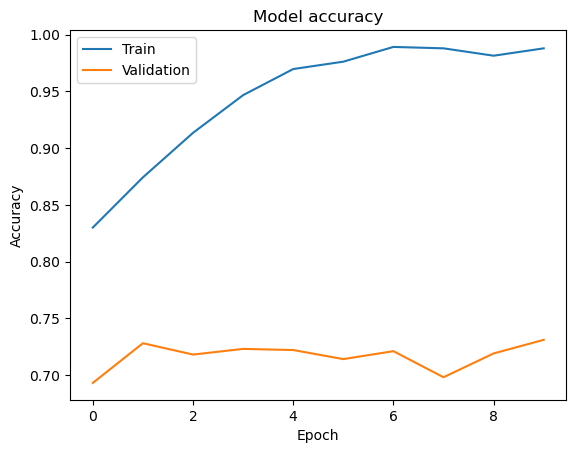

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

As the number of epochs increases, the training accuracy also increases, suggesting that the model is learning from the training data.
The validation accuracy, however, varies much more and does not show the same upward trend. Instead, it appears to hover around a lower value with minor fluctuations.
Insight:

High training accuracy with significantly lower validation accuracy might indicate that the model is overfitting to the training data. Overfitting means the model has learned the training data too well, including noise and outliers, and thus may not perform well on unseen data.

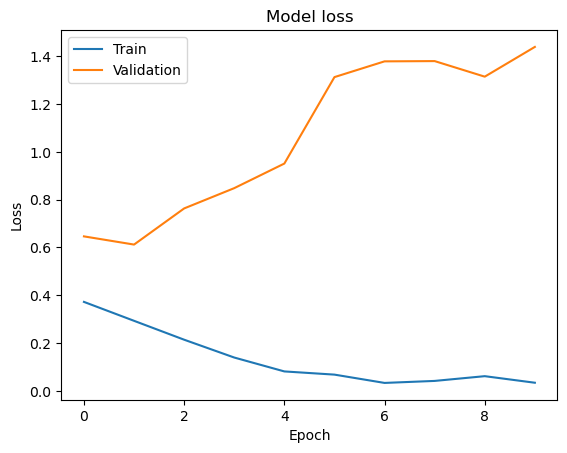

In [32]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The training loss is decreasing as more epochs are completed, suggesting that the model is learning and improving its performance on the training dataset.
The validation loss initially decreases, indicating that the model's generalization is improving. However, after a certain number of epochs, the validation loss starts to increase, which suggests that the model is beginning to overfit the training data.
Inference:

Overfitting is when a model learns the training data too well, including the noise and details that do not generalize well to new, unseen data. This is typically identified by an increase in validation loss while the training loss continues to decrease.
The epoch at which the validation loss begins to increase is often the point beyond which the model training yields negative returns in terms of generalization performance.
Insight:

The ideal number of epochs for training this model would be where the validation loss is at its minimum before it starts increasing, indicating the best trade-off between underfitting and overfitting.
It may be necessary to implement strategies to combat overfitting, such as early stopping.

Employing Early Stopping:

In [61]:
from tensorflow.keras.callbacks import EarlyStopping

In [62]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [63]:
# Train the model with early stopping
history = model.fit(
    train_generator,
    epochs=100,  
    validation_data=validation_generator,
    callbacks=[early_stopping]  # Pass the early stopping callback
)

Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.9877 - loss: 0.0329 - val_accuracy: 0.7290 - val_loss: 1.3073
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.9962 - loss: 0.0181 - val_accuracy: 0.7340 - val_loss: 1.5963
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.9949 - loss: 0.0162 - val_accuracy: 0.7110 - val_loss: 1.6672
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - accuracy: 0.9988 - loss: 0.0071 - val_accuracy: 0.7330 - val_loss: 1.6029


In [135]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 3, 224, 64)          │          14,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 3, 224, 32)          │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 3, 224, 2)           │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,546 (64.63 KB)

 Trainable params: 16,546 (64.63 KB)

 Non-trainable params: 0 (0.00 B)

Inference:

- The model achieved high training accuracy (around 99%) and low training loss (around 0.007) by the end of training, indicating that it learned the training data well.
- The validation accuracy and loss fluctuated across epochs but did not show significant improvement or degradation. This suggests that the model's performance on unseen data remained relatively stable.


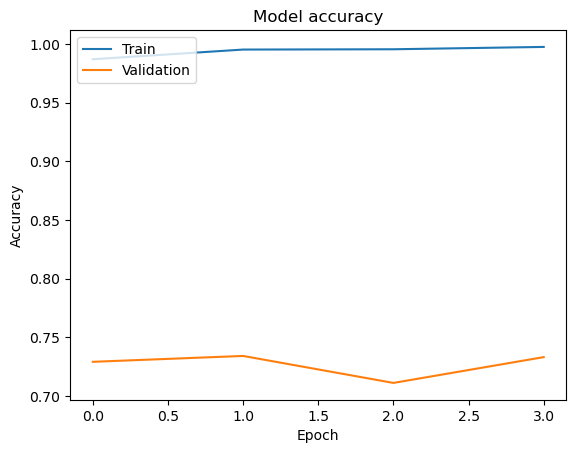

In [64]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- The training accuracy starts high and remains consistently close to 100%, indicating that the model is performing very well on the training dataset throughout the epochs.
- However, the validation accuracy starts much lower, around 70%, and does not show significant improvement over the epochs, which suggests that the model is not generalizing well to new, unseen data.



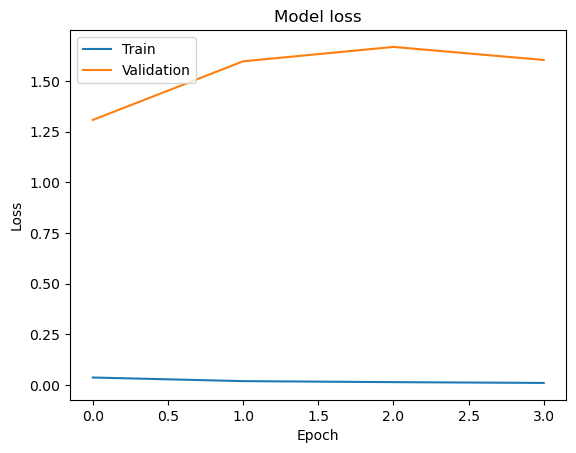

In [65]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- The graph indicates that the model is performing very well on the training data, with a very low loss.
- However, the validation loss being much higher suggests that the model is not generalizing well to unseen data, which is a classic sign of overfitting. Overfitting occurs when a model learns the details and noise in the training data to an extent that it negatively impacts the performance of the model on new data.


In [73]:
validation_loss, validation_accuracy = model.evaluate(validation_generator)

32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 256ms/step - accuracy: 0.7186 - loss: 1.4364


In [74]:
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

Validation Loss: 1.3072556257247925
Validation Accuracy: 0.7289999723434448


The model was evaluated on a validation dataset using a generator, resulting in a validation loss of 1.307 and a validation accuracy of approximately 72.9%. 


Due to early stopping, validation loss has come down to 1.3 with validation accuracy at about 72.9%

In [ ]:
5. Testing the Model:

In [119]:
import cv2
import matplotlib.pyplot as plt

In [147]:
test_img = cv2.imread('mord_data_scientist_take_home/validation/0/11504_11_22_201907_59_46_854_535084.jpeg')

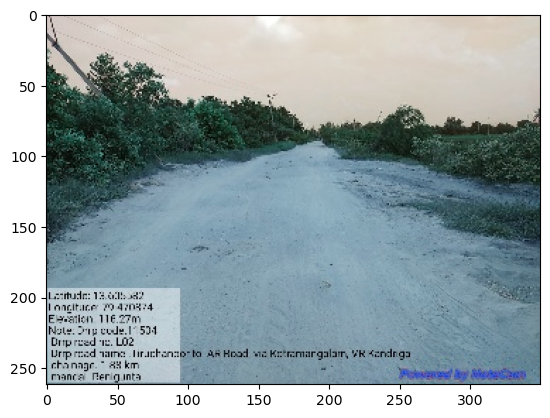

In [148]:
plt.imshow(test_img)

In [149]:
test_img.shape

(262, 350, 3)

In [150]:
test_img = cv2.resize(test_img,(224,224))

In [151]:
test_input = test_img.reshape((1,3,224,224))

In [156]:
predictions = model.predict(test_input)
predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


array([[[[0.0000000e+00, 1.0000000e+00],
         [0.0000000e+00, 1.0000000e+00],
         [0.0000000e+00, 1.0000000e+00],
         ...,
         [1.0568872e-12, 1.0000000e+00],
         [1.3869750e-16, 1.0000000e+00],
         [3.1321753e-02, 9.6867824e-01]],

        [[2.6642115e-15, 1.0000000e+00],
         [1.0000000e+00, 1.7642638e-08],
         [9.9999988e-01, 9.0658027e-08],
         ...,
         [0.0000000e+00, 1.0000000e+00],
         [0.0000000e+00, 1.0000000e+00],
         [0.0000000e+00, 1.0000000e+00]],

        [[0.0000000e+00, 1.0000000e+00],
         [0.0000000e+00, 1.0000000e+00],
         [4.7783125e-37, 1.0000000e+00],
         ...,
         [0.0000000e+00, 1.0000000e+00],
         [0.0000000e+00, 1.0000000e+00],
         [0.0000000e+00, 1.0000000e+00]]]], dtype=float32)

In [161]:
# Convert pixel-wise predictions to binary prediction based on majority voting
binary_prediction = int(predictions.mean() > 0.5)

print("Binary prediction:", binary_prediction)

Binary prediction: 0


The binary prediction is 0, which means that based on the model's output, the majority voting suggests that the image belongs to class 0 i.e Roads which require maintenance and would not be eligible for any payment which is the correct prediction. 